In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\hp\Documents\Python Scripts\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = "https://raw.githubusercontent.com/junaidshk/online-viewership/master/mediacompany.csv"
df = pd.read_csv(url, sep= ',')

In [4]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [5]:
df.shape

(80, 8)

In [6]:
df.sample()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,Unnamed: 7
36,4/6/2017,218302,1589841,2172278,1629943055,0,1,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            80 non-null     object 
 1   Views_show      80 non-null     int64  
 2   Visitors        80 non-null     int64  
 3   Views_platform  80 non-null     int64  
 4   Ad_impression   80 non-null     int64  
 5   Sport_matches   80 non-null     int64  
 6   Story_changes   80 non-null     int64  
 7   Unnamed: 7      0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [8]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df = df.drop('Unnamed: 7', axis= 1)
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [30]:
from datetime import datetime

d2 = datetime(2017, 2, 28)
d1 = df.Date
delta = d1 - d2
df['day'] = delta

In [31]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [32]:
df['day'] = df['day'].astype(str)
df['day'] = df['day'].map(lambda x: x[0:2] )
df['day'] = df['day'].astype(int)

In [33]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


<AxesSubplot:xlabel='day'>

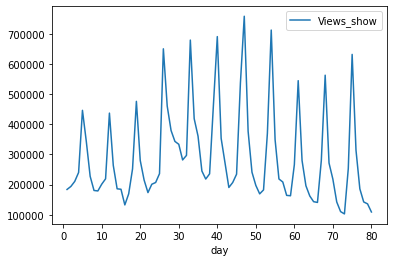

In [34]:
df.plot.line(x= 'day', y = 'Views_show')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


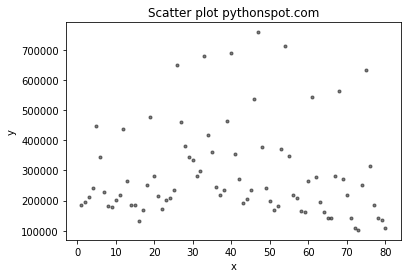

In [36]:
colors = (0,0,0)
area = np.pi*3
plt.scatter(df.day, df.Views_show, s=area, c= colors, alpha= 0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

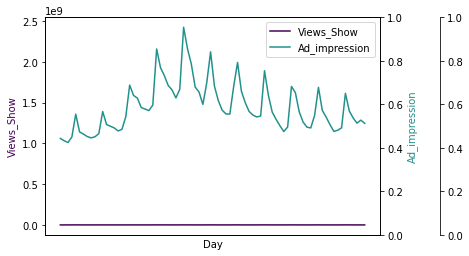

In [41]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("Views_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(0.9)


p1, = host.plot(df.day, df.Views_show, color= color1, label= "Views_Show")
p2, = host.plot(df.day, df.Ad_impression, color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles= lns, loc= 'best')

par2.spines['right'].set_position(('outward', 60))
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches= 'tight')

In [42]:
df['weekday'] = (df['day']+3)%7
df.weekday.replace(0,7,inplace=True)
df['weekday'] = df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [44]:
X = df[['Visitors', 'weekday']]

y = df['Views_show']

In [45]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X,y)


LinearRegression()

In [50]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 17 May 2021   Prob (F-statistic):           8.01e-12
Time:                        00:28:52   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [51]:
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else : return 0
    
    
df['weekend'] = [cond(i) for i in df['day']]

In [52]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Sport_matches,Story_changes,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [54]:
X = df[['Visitors', 'weekend']]

y = df['Views_show']

In [56]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 17 May 2021   Prob (F-statistic):           2.51e-12
Time:                        00:34:14   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [57]:
X = df[['Visitors', 'weekend', 'Story_changes']]

y = df['Views_show']

In [58]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 17 May 2021   Prob (F-statistic):           1.53e-14
Time:                        00:36:41   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.722e+04   9.31e+04     -0.507